# Weighted resampling for data exchange

1. generate two populations of some samples: sample1 and sample2
1. calculate weights for them based on omega and (1-omega)
1. exchange!
    1. calculate weights for resampling by the original weights
    1. resampling!
1. estimate the distribution (discrete)
1. compare the two distributions?


In [2]:
import random
import math
import matplotlib.pyplot as plt
import statistics

In [3]:
f_optimize_sigma = False
sigma_def = 10

# generate two populations of some samples: sample1 and sample2

In [5]:
rng = [0, 100]
dlt = 0.05
n_samples = 300
def genSamples(center):
    samples = []
    for i in range(n_samples):
        #samples.append(random.uniform(rng[0] + (rng[1]-rng[0])*0.1, rng[1] - (rng[1]-rng[0])*0.1))
        if i % 5 == 0:
            samples.append(rng[0] + (rng[1]-rng[0])*center)
        else:
            samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.uniform(rng[0], rng[1]))
        #samples.append(random.gauss((rng[0]+rng[1])/2.0, (rng[1]-rng[0])/2.0 * 0.1))
    return samples
samples1 = genSamples(0.3)
samples2 = genSamples(0.6)
print("sample1:")
print("max: " + str(max(samples1)))
print("min: " + str(min(samples1)))
print("sample2:")
print("max: " + str(max(samples2)))
print("min: " + str(min(samples2)))

sample1:
max: 99.13655612379544
min: 0.06459874625860396
sample2:
max: 99.92957384326068
min: 0.18081910663346745


# estimate the distributions (discrete)

In [13]:
sigma_opt = lambda s: statistics.variance(s) * math.pow(4.0/3.0/len(s), 1.0/5.0)
k = lambda x1, x2, sigma=sigma_def: math.exp(-(x1 - x2)**2/sigma/sigma)
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = [rng[0] + i * dlt for i in range(N)]

def estPDF(samples):
    x = rng[0]
    p = [0] * N
    sigma = sigma_opt(samples) if f_optimize_sigma else sigma_def
    for i in range(N):
        x = rng[0] + i * dlt
        for s in samples:
            p[i] += k(x, s, sigma)
    sum_p = sum(p) * dlt
    for i in range(len(p)):
        p[i] /= sum_p
    return p
def showPDF(p, title, ylim=None):
    plt.scatter(x_axis, p)
    plt.ylabel(title)
    if ylim != None:
        plt.ylim(0, ylim)
    plt.show()
    print('sum: ' + str(sum(p)*dlt))

In [10]:
p1 = estPDF(samples1)
p2 = estPDF(samples2)

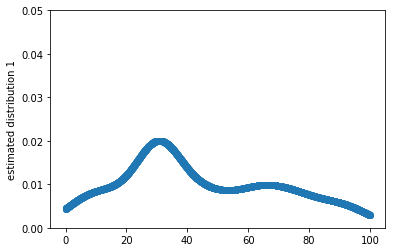

sum: 0.9999999999999969


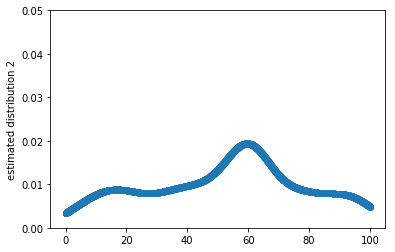

sum: 0.9999999999999991


In [11]:
showPDF(p1, 'estimated distribution 1', 0.05)
showPDF(p2, 'estimated distribution 2', 0.05)

# calculate weights for them based on omega and (1-omega)

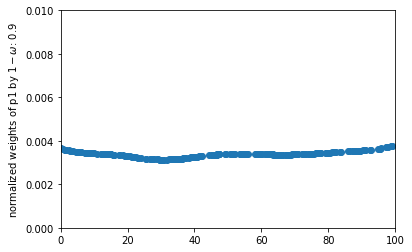

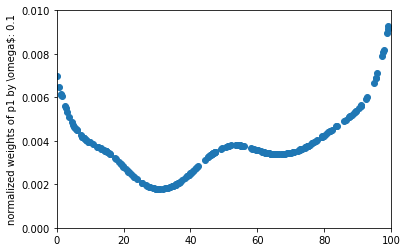

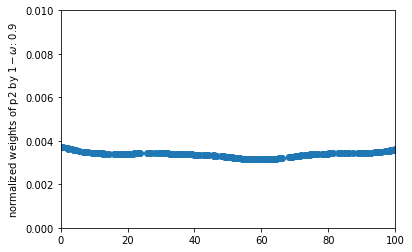

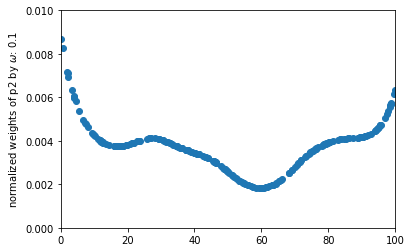

In [29]:
omega = 0.1
def genWeights(samples, omg):
    weights = [0] * n_samples
    sigma = sigma_opt(samples) if f_optimize_sigma else sigma_def
    for i in range(n_samples):
        for j in range(n_samples):
            weights[i] += k(samples[i], samples[j], sigma)
        weights[i] = math.pow(weights[i], omg - 1)
    return weights
w1 = genWeights(samples1, 1 - omega) # 1 - omega
w1c = genWeights(samples1, omega) # omega
w2 = genWeights(samples2, 1 - omega) # 1 - omega
w2c = genWeights(samples2, omega) # omega
def showW(samples, weights, title, ylim = None):
    sum_weight = sum(weights)
    w = list(weights)
    for i in range(n_samples):
        w[i] /= sum_weight
    plt.scatter(samples, w)
    plt.ylabel(title)
    if not ylim == None:
        plt.ylim(0, ylim)
    plt.xlim(rng[0], rng[1])
    plt.show()
showW(samples1, w1, 'normalized weights of p1 by $1 - \omega$: ' + str(1 - omega), 0.01)
showW(samples1, w1c, 'normalized weights of p1 by \omega$: ' + str(omega), 0.01)
showW(samples2, w2, 'normalized weights of p2 by $1 - \omega$: ' + str(1 - omega), 0.01)
showW(samples2, w2c, 'normalized weights of p2 by $\omega$: ' + str(omega), 0.01)

# exchange!
1. calculate weights for resampling by the original weights
1. resampling!

# estimate the distribution (discrete)

# compare the two distributions?

---
# what if $omega = 0$?
